In [1]:
import pandas as pd

df = pd.read_csv("ball_by_ball_ipl.csv")
df.head()


,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,1,RD Gaikwad,...,Chennai Super Kings,0,4,0,1,0,NaN,NaN,4,1
1,1,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,2,RD Gaikwad,...,Chennai Super Kings,0,4,0,2,0,NaN,NaN,0,1
2,2,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,3,RD Gaikwad,...,Chennai Super Kings,0,4,0,3,0,NaN,NaN,0,1
3,3,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,4,RD Gaikwad,...,Chennai Super Kings,0,4,0,4,0,NaN,NaN,0,1
4,4,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,5,RD Gaikwad,...,Chennai Super Kings,0,5,0,5,0,NaN,NaN,1,1


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239693 entries, 0 to 239692
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               239693 non-null  int64  
 1   Match ID                 239693 non-null  int64  
 2   Date                     239693 non-null  object 
 3   Venue                    239693 non-null  object 
 4   Bat First                239693 non-null  object 
 5   Bat Second               239693 non-null  object 
 6   Innings                  239693 non-null  int64  
 7   Over                     239693 non-null  int64  
 8   Ball                     239693 non-null  int64  
 9   Batter                   239693 non-null  object 
 10  Non Striker              239693 non-null  object 
 11  Bowler                   239693 non-null  object 
 12  Batter Runs              239693 non-null  int64  
 13  Extra Runs               239693 non-null  int64  
 14  Runs

In [3]:
df.columns


Index(['Unnamed: 0', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')

In [4]:
df.shape


(239693, 35)

In [17]:
top_scorers = df.groupby('Batter')['Batter Runs'].sum().sort_values(ascending=False).head(10)
print(top_scorers)



Batter
V Kohli           7122
S Dhawan          6573
DA Warner         6310
RG Sharma         6165
SK Raina          5512
MS Dhoni          5082
AB de Villiers    5001
RV Uthappa        4941
CH Gayle          4875
KD Karthik        4408
Name: Batter Runs, dtype: int64


In [6]:
df.columns


Index(['Unnamed: 0', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')

In [7]:
top_scorers = df.groupby('Batter')['Batter Runs'].sum().sort_values(ascending=False).head(10)
print(top_scorers)


Batter
V Kohli           7122
S Dhawan          6573
DA Warner         6310
RG Sharma         6165
SK Raina          5512
MS Dhoni          5082
AB de Villiers    5001
RV Uthappa        4941
CH Gayle          4875
KD Karthik        4408
Name: Batter Runs, dtype: int64


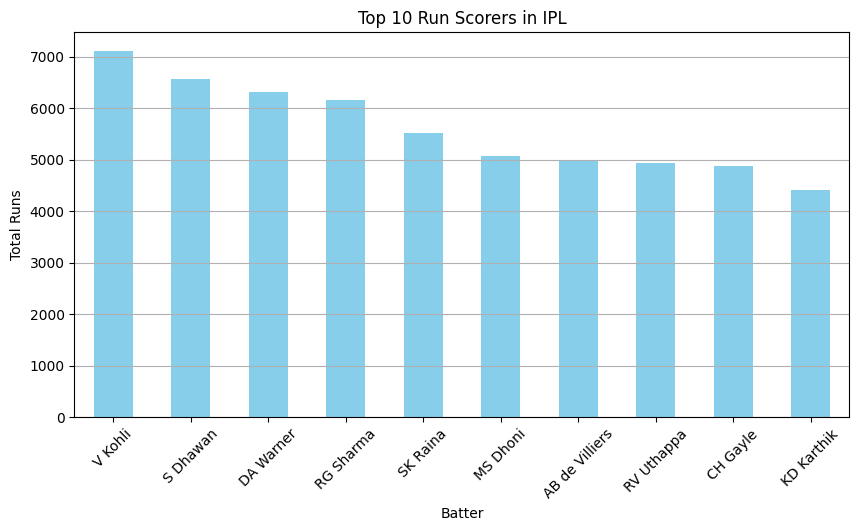

In [8]:
import matplotlib.pyplot as plt

top_scorers.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top 10 Run Scorers in IPL')
plt.xlabel('Batter')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [9]:
# Total runs scored by each batter
total_runs = df.groupby('Batter')['Batter Runs'].sum()

# Total balls faced by each batter
balls_faced = df.groupby('Batter')['Batter Balls Faced'].sum()

# Calculate strike rate
strike_rate = (total_runs / balls_faced) * 100

# Filter batters who faced more than 200 balls
qualified = balls_faced[balls_faced > 200].index
strike_rate_filtered = strike_rate[qualified].sort_values(ascending=False).head(10)

# Display top 10 strike rates
print(strike_rate_filtered)


Batter
K Gowtham         41.929499
M Morkel          41.042345
KK Cooper         39.189189
JC Archer         38.342967
MJ McClenaghan    37.168142
MS Gony           34.767025
B Lee             34.254144
Mohammad Nabi     30.912863
BCJ Cutting       30.709677
Mohammed Shami    30.705394
dtype: float64


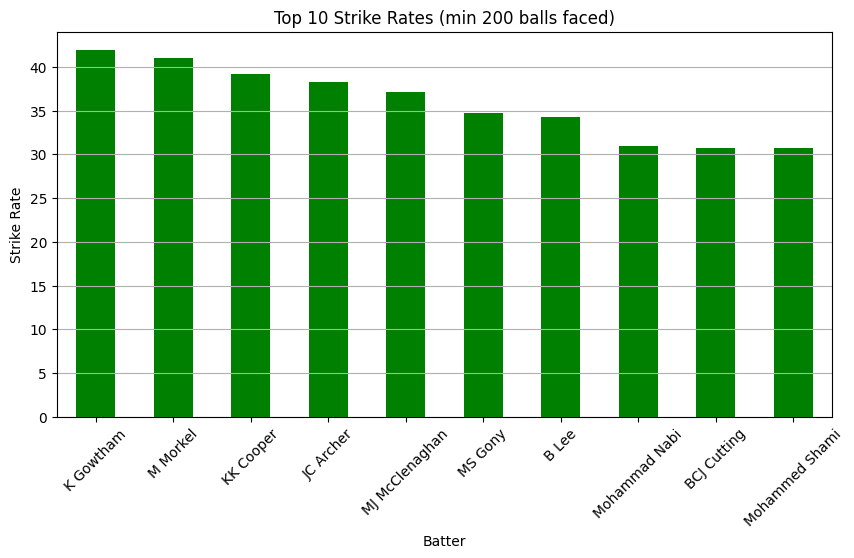

In [10]:
strike_rate_filtered.plot(kind='bar', color='green', figsize=(10,5))
plt.title('Top 10 Strike Rates (min 200 balls faced)')
plt.xlabel('Batter')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [11]:
# Filter only the deliveries where 6 runs were scored
sixes = df[df['Batter Runs'] == 6]

# Count sixes by each batter
most_sixes = sixes['Batter'].value_counts().head(10)
print(most_sixes)


Batter
CH Gayle          348
RG Sharma         257
AB de Villiers    245
MS Dhoni          239
V Kohli           230
DA Warner         224
KA Pollard        213
SK Raina          202
SR Watson         188
AD Russell        187
Name: count, dtype: int64


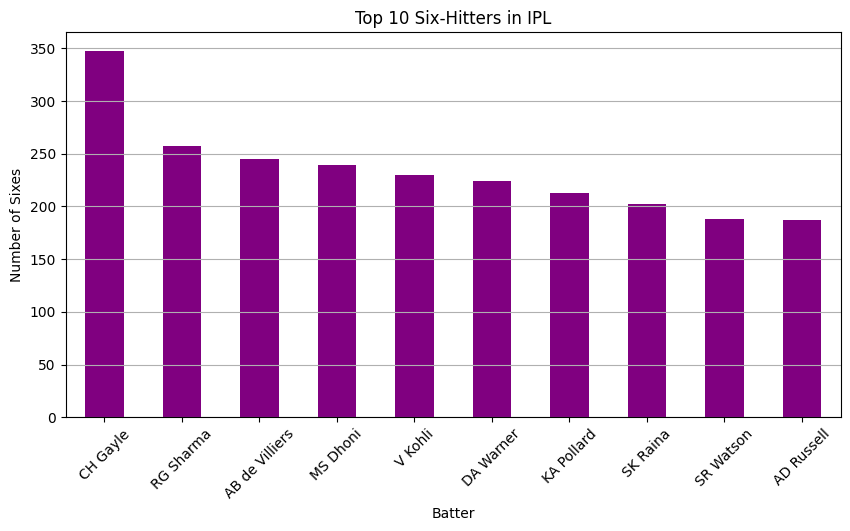

In [12]:
most_sixes.plot(kind='bar', color='purple', figsize=(10,5))
plt.title('Top 10 Six-Hitters in IPL')
plt.xlabel('Batter')
plt.ylabel('Number of Sixes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [13]:
# Filter only rows where a wicket was taken
wickets = df[df['Wicket'] == True]

# Count how many times each bowler took a wicket
top_wicket_takers = wickets['Bowler'].value_counts().head(10)
print(top_wicket_takers)


Bowler
DJ Bravo           207
YS Chahal          189
R Ashwin           186
SL Malinga         186
PP Chawla          186
B Kumar            183
SP Narine          182
A Mishra           179
Harbhajan Singh    160
RA Jadeja          160
Name: count, dtype: int64


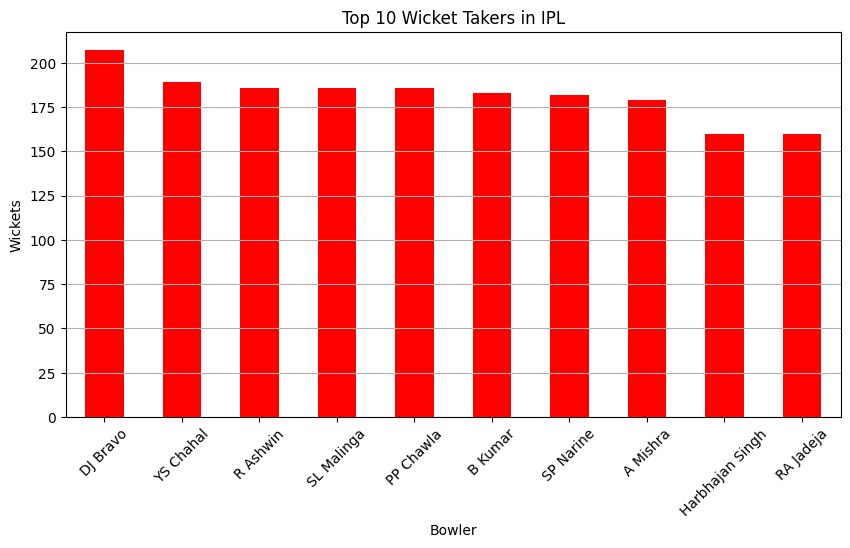

In [14]:
top_wicket_takers.plot(kind='bar', color='red', figsize=(10,5))
plt.title('Top 10 Wicket Takers in IPL')
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [15]:
# Step 1: Group total runs conceded by each bowler
runs_conceded = df.groupby('Bowler')['Bowler Runs Conceded'].sum()

# Step 2: Count valid balls bowled by each bowler
valid_balls = df[df['Valid Ball'] == True].groupby('Bowler').size()

# Step 3: Calculate economy rate
economy = (runs_conceded / valid_balls) * 6

# Step 4: Sort and get top 10 most economical bowlers (min 300 balls bowled for fairness)
economy = economy[valid_balls > 300].sort_values().head(10)
print(economy)


Bowler
A Kumble            6.578238
GD McGrath          6.611111
Rashid Khan         6.665347
SP Narine           6.732061
RE van der Merwe    6.744921
M Muralitharan      6.756098
DL Vettori          6.787645
MJ Santner          6.884615
DW Steyn            6.889405
J Botha             6.916427
dtype: float64


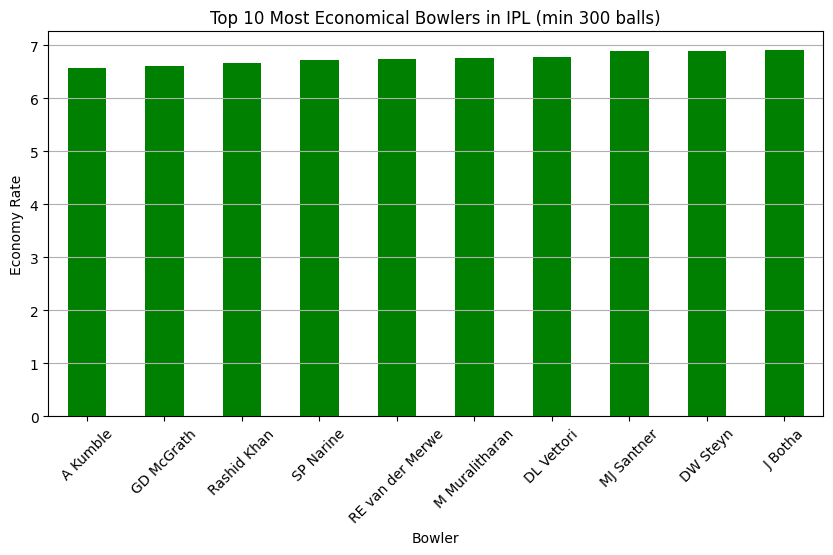

In [16]:
economy.plot(kind='bar', color='green', figsize=(10,5))
plt.title('Top 10 Most Economical Bowlers in IPL (min 300 balls)')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
